In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
#1
flights = sns.load_dataset('flights')
flights.iloc[[4, 20, 25, 45, 88, 100,141,143],2] = np.nan
flights

,year,month,passengers
0,1949,Jan,112.0
1,1949,Feb,118.0
2,1949,Mar,132.0
3,1949,Apr,129.0
4,1949,May,NaN
...,...,...,...
139,1960,Aug,606.0
140,1960,Sep,508.0
141,1960,Oct,NaN
142,1960,Nov,390.0


In [25]:
flights.isnull().sum()

year          0
month         0
passengers    8
dtype: int64

In [26]:
flights.passengers.dropna()

0      112.0
1      118.0
2      132.0
3      129.0
5      135.0
       ...  
137    535.0
138    622.0
139    606.0
140    508.0
142    390.0
Name: passengers, Length: 136, dtype: float64

In [16]:
flights.passengers.dropna().isnull().sum()

0

In [27]:
flights.passengers

0      112.0
1      118.0
2      132.0
3      129.0
4        NaN
       ...  
139    606.0
140    508.0
141      NaN
142    390.0
143      NaN
Name: passengers, Length: 144, dtype: float64

In [33]:
flights.passengers.fillna(method='ffill')
# null degeri bi gerisindeki ile doldurur
# bfill null degeri bir ilerisindekine göre doldurur

0      112.0
1      118.0
2      132.0
3      129.0
4      129.0
       ...  
139    606.0
140    508.0
141    508.0
142    390.0
143    390.0
Name: passengers, Length: 144, dtype: float64

In [36]:
flights.passengers.head(6)

0    112.0
1    118.0
2    132.0
3    129.0
4      NaN
5    135.0
Name: passengers, dtype: float64

In [37]:
flights.passengers.head(6).replace(np.nan, method='bfill')

0    112.0
1    118.0
2    132.0
3    129.0
4    135.0
5    135.0
Name: passengers, dtype: float64

In [39]:
flights.passengers.head(6).interpolate()

0    112.0
1    118.0
2    132.0
3    129.0
4    132.0
5    135.0
Name: passengers, dtype: float64

In [40]:
#2
df = sns.load_dataset('diamonds')
df.select_dtypes(include=['float64', 'int64'])
df = df.dropna()
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [41]:
df_table = df.table
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [42]:
Q1 = df_table.quantile(.25)
Q3 = df_table.quantile(.75)
IQR = Q3 - Q1
IQR

3.0

In [43]:
lover_lim = Q1 - 1.5 * IQR
lover_lim

51.5

In [44]:
upper_lim = Q1 + 1.5 * IQR
upper_lim

60.5

In [45]:
df[(df_table >= lover_lim) & (df_table < upper_lim)]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [48]:
from scipy.stats.mstats import winsorize
df_win = winsorize(df.table, (0.001,0.019))

<AxesSubplot:ylabel='Frequency'>

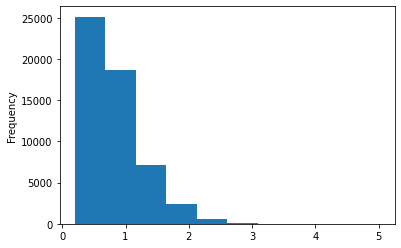

In [51]:
df.carat.plot(kind = 'hist')

In [52]:
df['log_carat'] = np.log(df.carat)
df

,carat,cut,color,clarity,depth,table,price,x,y,z,log_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


<AxesSubplot:xlabel='carat'>

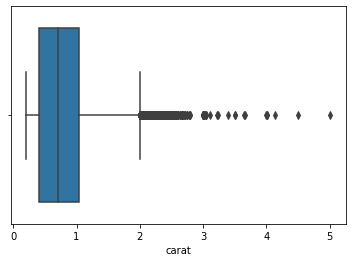

In [53]:
sns.boxplot(x = df.carat)

<AxesSubplot:xlabel='log_carat'>

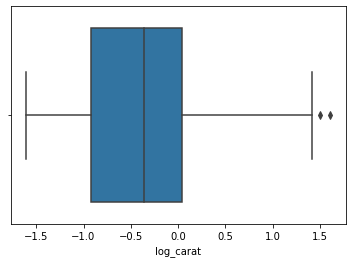

In [54]:
sns.boxplot(x = df.log_carat)

In [57]:
#3
df = pd.DataFrame({'name' : "mohan maria sakib tao virat khusbu dmitry selena john imran jose deepika yoseph binod gulshan johnson donald aamir ken Liue".split(),
                   'height' : [1.2, 2.3, 4.9, 5.1, 5.2, 5.4, 5.5, 5.5, 5.6, 5.6, 5.8, 5.9, 6, 6.1, 6.2, 6.5, 7.1, 14.5, 23.2, 40.2]})
df

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [58]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


In [59]:
Q1 = df.height.quantile(.25)
Q3 = df.height.quantile(.75)
IQR = Q3 - Q1

In [62]:
lower_limit = Q1 - 1.5 * IQR
lower_limit

3.962500000000001

In [63]:
upper_limit = Q3 + 1.5 * IQR
upper_limit

7.6625

In [64]:
df[(df.height < lower_limit) | (df.height > upper_limit)]

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liue,40.2


In [65]:
df_no_outlier = df[(df.height > lower_limit) & (df.height < upper_limit)]
df_no_outlier

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9
